# 직접 만들어본 머신러닝 알고리즘

- 머신러닝 알고리즘을 완벽하게 이해하기 위하여 학교수업 혹은 구글링을 바탕으로 관련 수식을 이해하고 알고리즘을 만들어 보았다.
- sikit-learn 모듈처럼 class 안에 fit, predict, score 함수를 넣어 구현하였다.
- fit(X_train, y_train) : train data를 적합시키고 모델을 만든다.
- predict(X_test) : 분류기일 경우, 예측 특성값이 들어있는 벡터를 반환한다.
- score(X_test, y_test) : 정답레이블과 예측레이블을 비교하여 정확도를 반환한다.

## 나이브베이즈 분류기

### 1. 알고리즘

In [16]:
import numpy as np

class naive_bayes_classifier:
    print('가우시안 정규분포를 가정한 나이브베이즈 모형입니다.')
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
        y_label_list, y_label_counts = np.unique(y_train, return_counts = True)
        self.y_label_list = y_label_list
        self.y_label_counts = y_label_counts
        
        parameter = []
        
        for label in y_label_list:
            label_boolean = (self.y_train == label).flatten()
            mean_var_list = []
            
            for v in range(self.X_train.shape[1]):
                mean = np.mean(X_train[label_boolean, v])
                var = np.var(X_train[label_boolean, v])
                mean_var_list.append({'mean' : mean,
                                      'var' : var})
        
            parameter.append(mean_var_list)
            
        self.parameter = parameter
        return self.parameter
        
    def predict(self, X_test):
        
        self.X_test = X_test
        
        y_pred = []
        
        for x in range(len(self.X_test)):
            posterior_list = []
            
            for label_loc in range(len(self.y_label_list)):
                prior = self.y_label_counts[label_loc] / len(self.y_train)
                likelihood = 1
                
                for v in range(self.X_train.shape[1]):
                    mean = self.parameter[label_loc][v]['mean']
                    var = self.parameter[label_loc][v]['var']
                    
                    likelihood *= np.exp(-((self.X_test[x, v] - mean) ** 2) / (2 * var)) / (np.sqrt(2 * var))
                
                posterior_list.append(prior * likelihood)
            
            max_loc = np.argmax(posterior_list)
            y_pred.append(self.y_label_list[max_loc])
        
        return np.array(y_pred)
    
    def score(self, X_test, y_test):
        
        return np.mean(self.predict(X_test) == y_test)


가우시안 정규분포를 가정한 나이브베이즈 모형입니다.


### 2. 검증

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples = 200, centers = 2, n_features=2, random_state=0, cluster_std = 0.4)

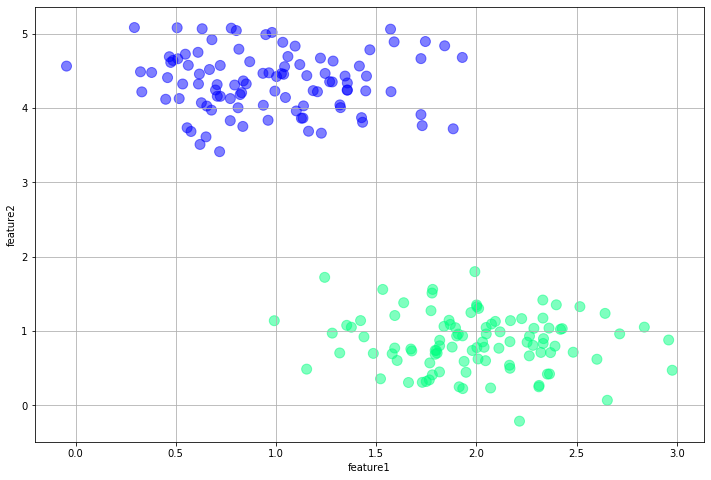

In [18]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter', s = 100, alpha = 0.5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid()
plt.show()

- 위와 같은 데이터 셋을 머신러닝 모델을 이용하여 예측하고자 한다.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
nb = naive_bayes_classifier() # 위에서 만든 지도학습 알고리즘
nb.fit(X_train, y_train) # train data 적합
y_pred = nb.predict(X_test) # 예측 레이블 반환
print('예측 스코어 : ' + str(nb.score(X_test, y_test))) # 예측률 반환

예측 스코어 : 1.0


- 훈련 데이터로 만들어진 모델에 대한 테스트셋의 정확도는 1.0이다.
- 그래프를 통해 확인해보도록 하자

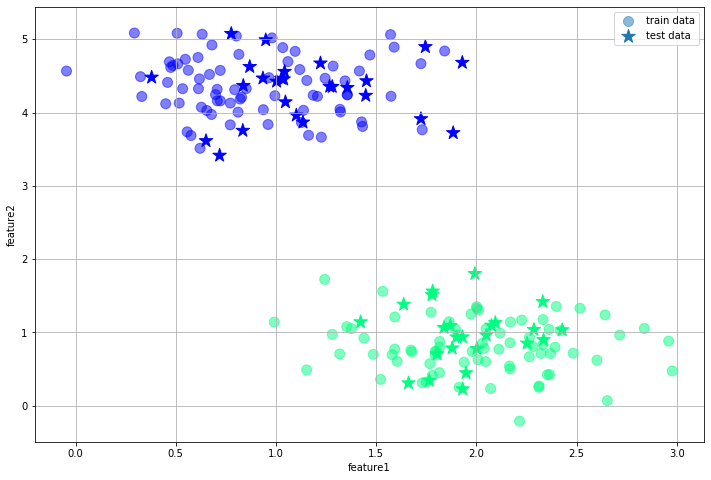

In [21]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'winter', label = 'train data', s = 100, alpha = 0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred, cmap = 'winter', label = 'test data', s = 200, marker = '*')
plt.legend()
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.grid()
plt.show()

- train data는 점으로, test data는 별모양으로 표시하였다.
- 분류가 잘 되어진것을 확인할 수 있다.